# Predicting Catalog Demand

#### What decisions need to be made?
Analyze a problem in the mail-order catalog business to determine how much profit the company can expect from sending a catalog to new customers.

#### What has to be done?
Predict how much money your company can expect to earn from sending out a catalog to new customers. This task will involve building the model and applying the results in order to provide a recommendation to management.
The Predictions will be made based on the hisoric data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import dataset 
#customers dataset is the training dataset. It is the data collected during the last month.
customers = pd.read_excel(r'p1-customers.xlsx')
customers.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [3]:
# mailing_list data is the data pertaining to the new customers to whom we are still contempleting if we should send them the catalogue or not.
# This will be our testing dataset.
mailing_list = pd.read_excel(r'p1-mailinglist.xlsx')
mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


## DATA UNDERSTANDING

In [4]:
# information about customers dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
Name                          2375 non-null object
Customer_Segment              2375 non-null object
Customer_ID                   2375 non-null int64
Address                       2375 non-null object
City                          2375 non-null object
State                         2375 non-null object
ZIP                           2375 non-null int64
Avg_Sale_Amount               2375 non-null float64
Store_Number                  2375 non-null int64
Responded_to_Last_Catalog     2375 non-null object
Avg_Num_Products_Purchased    2375 non-null int64
#_Years_as_Customer           2375 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 167.1+ KB


In [5]:
customers['Customer_Segment'].value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

In [6]:
customers['City'].value_counts()

Denver               750
Aurora               493
Arvada               247
Lakewood             217
Broomfield           125
Westminster           85
Centennial            78
Littleton             72
Englewood             56
Wheat Ridge           54
Thornton              35
Parker                27
Northglenn            24
Highlands Ranch       23
Golden                19
Greenwood Village     14
Edgewater             12
Commerce City         10
Superior               9
Morrison               7
Lafayette              5
Louisville             4
Boulder                3
Brighton               2
Castle Pines           2
Henderson              1
Lone Tree              1
Name: City, dtype: int64

In [7]:
customers['State'].value_counts()

CO    2375
Name: State, dtype: int64

In [8]:
customers['Store_Number'].value_counts()

100    326
105    305
106    283
101    276
104    270
107    226
103    225
108    210
109    169
102     85
Name: Store_Number, dtype: int64

In [9]:
customers['Store_Number']= customers['Store_Number'].astype(object)

In [10]:
customers['Avg_Num_Products_Purchased'].value_counts().sort_index()

1     858
2     289
3     277
4     240
5     235
6     216
7     164
8      36
9       7
10      9
11     10
12      8
13      1
14      1
15      3
16      7
17      5
18      1
19      2
20      1
21      2
22      2
26      1
Name: Avg_Num_Products_Purchased, dtype: int64

In [11]:
customers['#_Years_as_Customer'].value_counts().sort_index()

1    297
2    316
3    285
4    284
5    294
6    307
7    279
8    313
Name: #_Years_as_Customer, dtype: int64

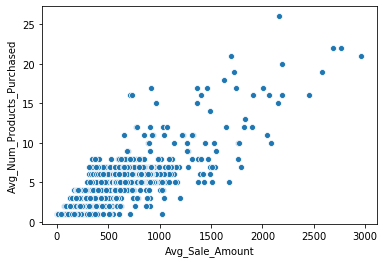

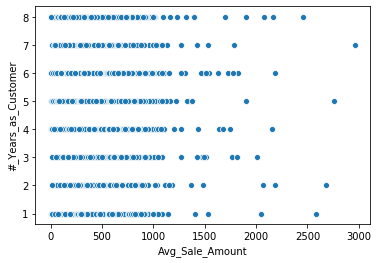

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Avg_Num_Products_Purchased','#_Years_as_Customer']

for i in columns:
    sns.scatterplot(y = customers[i], x = customers['Avg_Sale_Amount'])
    plt.show()

From the above scatterplots of numeric independent variables(#Years_as_Customers, Avg_Num_Products_Purchased) and dependent variable (Avg_Sale_Amount)

### UNDERSTANDING LINEAR RELATION

In [15]:
import scipy.stats

In [16]:
scipy.stats.linregress(customers['Avg_Sale_Amount'],customers['Avg_Num_Products_Purchased'])
# Very Strong correlation
# p_value is also 0.0
# r_value is very high

LinregressResult(slope=0.006890421686239763, intercept=0.5927563435871765, rvalue=0.8557542170755574, pvalue=0.0, stderr=8.551842122731474e-05)

In [17]:
scipy.stats.linregress(customers['Avg_Sale_Amount'],customers['#_Years_as_Customer'])
# No correlation
# high p_value >> 0.05 : correlation by chance
# feature doesn't contribute much individually to the linear prediction

LinregressResult(slope=0.00020227137171599722, intercept=4.4197687248542605, rvalue=0.029781863514273383, pvalue=0.14679482844781203, stderr=0.0001393609169906423)

## DATA PREPARATION

In [18]:
# Converting categorical variables into dummy variables for better interpretation by the machine
df = pd.get_dummies(customers[['Customer_Segment','Store_Number']])

In [19]:
df['Avg_Sale_Amount'] = customers['Avg_Sale_Amount']
df['Avg_Num_Products_Purchased'] = customers['Avg_Num_Products_Purchased']
df['#_Years_as_Customer'] = customers['#_Years_as_Customer']

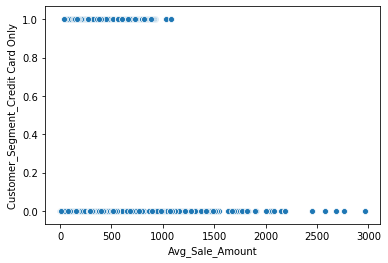

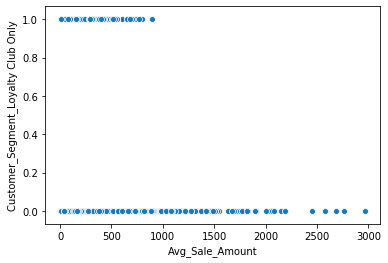

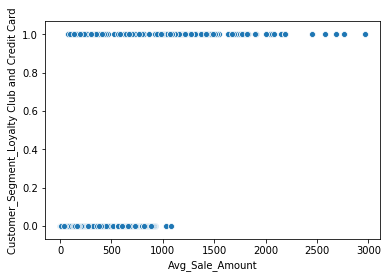

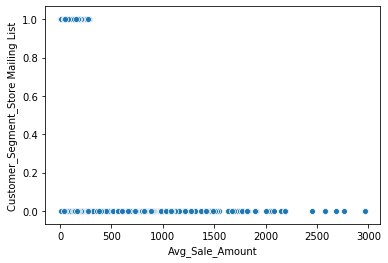

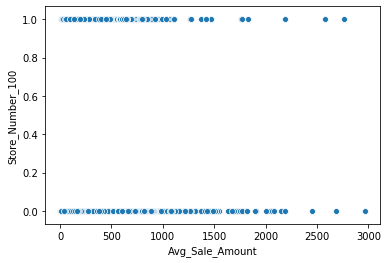

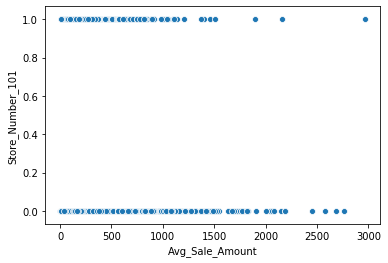

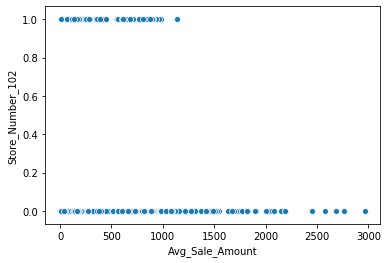

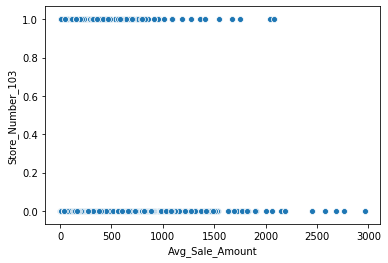

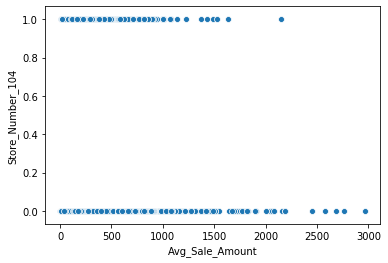

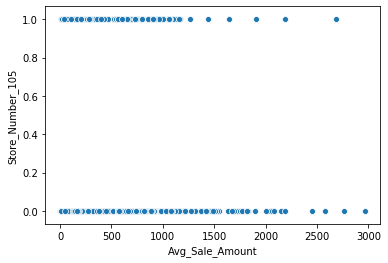

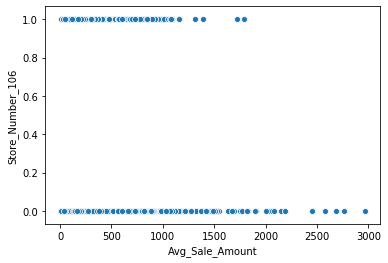

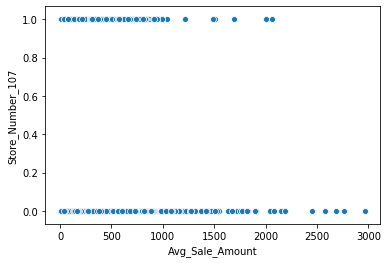

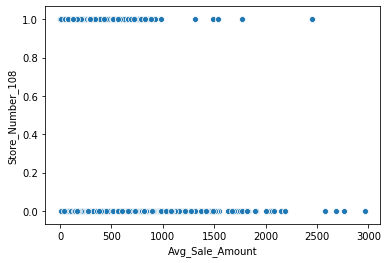

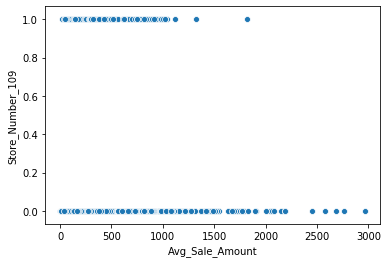

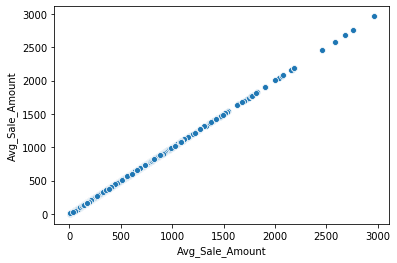

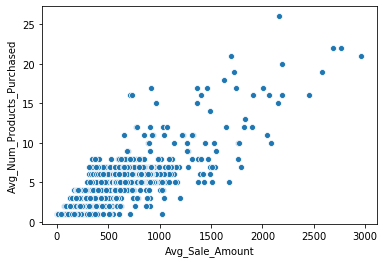

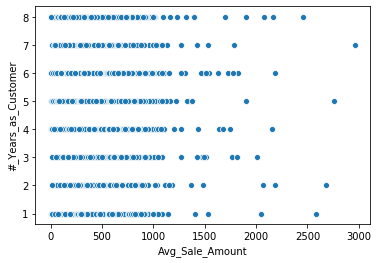

In [20]:
#Scatterplots for all variables
for i in df.columns:
    sns.scatterplot(y = df[i], x = df['Avg_Sale_Amount'])
    plt.show()

In [21]:
# Linear regression coefficients for all variables
for i in df.columns:
    print(i,scipy.stats.linregress(df['Avg_Sale_Amount'],df[i]),"\n")

Customer_Segment_Credit Card Only LinregressResult(slope=0.0005089006422779168, intercept=0.004554707493718085, rvalue=0.4263576980846722, pvalue=1.5975575652669745e-105, stderr=2.2163831062929233e-05) 

Customer_Segment_Loyalty Club Only LinregressResult(slope=-7.255952217672437e-06, intercept=0.24669021539820862, rvalue=-0.005746467411130729, pvalue=0.7795518781943153, stderr=2.592014496862306e-05) 

Customer_Segment_Loyalty Club and Credit Card LinregressResult(slope=0.00047640414797740554, intercept=-0.10876982545727197, rvalue=0.5914878369245159, pvalue=3.769875032090083e-224, stderr=1.333168379665471e-05) 

Customer_Segment_Store Mailing List LinregressResult(slope=-0.0009780488380376497, intercept=0.8575249025653452, rvalue=-0.6666552995071309, pvalue=3.3369210186442383e-305, stderr=2.2448121683860358e-05) 

Store_Number_100 LinregressResult(slope=1.5113301649486887e-05, intercept=0.13122125144114588, rvalue=0.014934082748740338, pvalue=0.4669475253144909, stderr=2.0772247715106

In [22]:
df.head()

,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,Store_Number_100,Store_Number_101,Store_Number_102,Store_Number_103,Store_Number_104,Store_Number_105,Store_Number_106,Store_Number_107,Store_Number_108,Store_Number_109,Avg_Sale_Amount,Avg_Num_Products_Purchased,#_Years_as_Customer
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,227.90,1,6
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,55.00,1,6
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,212.57,1,3
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,195.31,1,6
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,110.55,1,2


In [23]:
#X = df.loc[:, (df.columns != ['Avg_Sale_Amount'] )]
# Splitting the dataset into training and testing set

X = df.drop(['Avg_Sale_Amount'], axis=1)
y = df['Avg_Sale_Amount']

In [24]:
X.info()
# We are using the following features in the final model.
# We cannot use additional features such as 'City' and 'Responded_to_Last_Catalog' because these are not present in the testing dataset
# Also, cities will be anyways be covered by Store_Name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 16 columns):
Customer_Segment_Credit Card Only                2375 non-null uint8
Customer_Segment_Loyalty Club Only               2375 non-null uint8
Customer_Segment_Loyalty Club and Credit Card    2375 non-null uint8
Customer_Segment_Store Mailing List              2375 non-null uint8
Store_Number_100                                 2375 non-null uint8
Store_Number_101                                 2375 non-null uint8
Store_Number_102                                 2375 non-null uint8
Store_Number_103                                 2375 non-null uint8
Store_Number_104                                 2375 non-null uint8
Store_Number_105                                 2375 non-null uint8
Store_Number_106                                 2375 non-null uint8
Store_Number_107                                 2375 non-null uint8
Store_Number_108                                 2375 non-null ui

## MODEL BUILDING

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 217344076866093.84
Coefficients: 
 [ 6.07746742e+13  6.07746742e+13  6.07746742e+13  6.07746742e+13
 -2.78118751e+14 -2.78118751e+14 -2.78118751e+14 -2.78118751e+14
 -2.78118751e+14 -2.78118751e+14 -2.78118751e+14 -2.78118751e+14
 -2.78118751e+14 -2.78118751e+14  6.69218750e+01 -2.39013672e+00]


In [27]:
y_pred = model.predict(X)

In [28]:
# Prediction score
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.8376105757974661


## MODEL TESTING

In [29]:
mailing_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
Name                          250 non-null object
Customer_Segment              250 non-null object
Customer_ID                   250 non-null int64
Address                       250 non-null object
City                          250 non-null object
State                         250 non-null object
ZIP                           250 non-null int64
Store_Number                  250 non-null int64
Avg_Num_Products_Purchased    250 non-null int64
#_Years_as_Customer           250 non-null float64
Score_No                      250 non-null float64
Score_Yes                     250 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 18.6+ KB


In [30]:
# converting Store_Number to categorical object as it has no numerical significance
# also get_dummies function converts only object types to dummy variables
mailing_list['Store_Number'] = mailing_list['Store_Number'].astype(object)

In [31]:
ml = pd.get_dummies(mailing_list[['Customer_Segment','Store_Number']])

ml['Avg_Num_Products_Purchased'] = mailing_list['Avg_Num_Products_Purchased']

ml['#_Years_as_Customer'] = mailing_list['#_Years_as_Customer']

In [32]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
Customer_Segment_Credit Card Only                250 non-null uint8
Customer_Segment_Loyalty Club Only               250 non-null uint8
Customer_Segment_Loyalty Club and Credit Card    250 non-null uint8
Customer_Segment_Store Mailing List              250 non-null uint8
Store_Number_100                                 250 non-null uint8
Store_Number_101                                 250 non-null uint8
Store_Number_102                                 250 non-null uint8
Store_Number_103                                 250 non-null uint8
Store_Number_104                                 250 non-null uint8
Store_Number_105                                 250 non-null uint8
Store_Number_106                                 250 non-null uint8
Store_Number_107                                 250 non-null uint8
Store_Number_108                                 250 non-null uint8
Store_Numbe

In [33]:
# final testing set
X_test = ml

In [34]:
y_test = model.predict(X_test)

In [35]:
mailing_list['Revenue_Predicted'] = y_test

In [36]:
mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Revenue_Predicted
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,354.62500
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,1006.87500
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,636.18750
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,308.03125
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,424.93750


In [38]:
mailing_list['actual_buy'] = mailing_list['Score_Yes']*mailing_list['Revenue_Predicted']

In [39]:
mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Revenue_Predicted,actual_buy
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,354.62500,108.173323
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,1006.87500,475.974518
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,636.18750,368.277397
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,308.03125,93.991981
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,424.93750,164.750757


## SUGGESTIONS

In [40]:
total_revenue = mailing_list['actual_buy'].sum()
total_revenue

47980.77067491775

In [41]:
cost_of_printing_distri_catalog = 6.50*250
cost_of_printing_distri_catalog

1625.0

In [45]:
average_gross_margin = 0.50
average_revenue = 0.50*total_revenue
average_revenue

23990.385337458876

In [43]:
total_profit = average_revenue - cost_of_printing_distri_catalog 
total_profit

22365.385337458876

In [44]:
#total_profit > 10000
# We should send the catalogs to these customers

The total revenue generated by sending catalogues to the new 250 customers, after considering the chances of a person buying or not buying a product as well, is USD 47980.77
After considering the average gross margin, i.e, the profit made by company after substracting the additional cost of producing a product is USD 23990.38.
Since the cost of printing and distributing a catalogue is $ 1625.0, the final profit that can be made by sending catalogues to 250 new customers is USD 22365.38.
It seems wise to send catalogues to new customers as the predicted profit is almost double the targeted profit amount(i.e. USD 10000)